<a href="https://colab.research.google.com/github/eshakmahmed7/CVPR/blob/master/18-38088-2%20Mid%20Project%20CVPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import numpy as np
import matplotlib.pyplot as plt

In [6]:
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()
print(f"train img shape{train_imgs.shape}")
print(f"train img shape{train_labels.shape}")
print(f"test img shape{train_imgs.shape}")
print(f"test img shape{train_labels.shape}")
print("test img data type :",type(train_imgs))

train img shape(60000, 28, 28)
train img shape(60000,)
test img shape(60000, 28, 28)
test img shape(60000,)
test img data type : <class 'numpy.ndarray'>


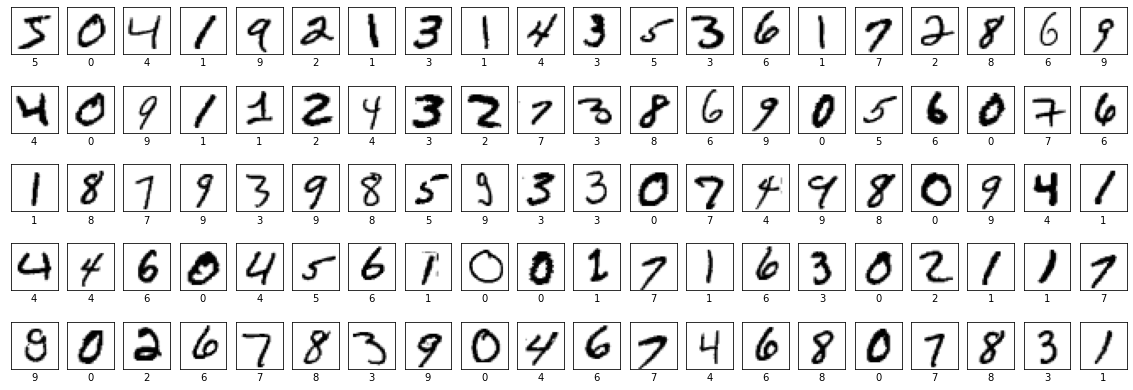

In [7]:
R = 5
C = 20
i = 0
plt.figure(figsize=(20,7))
for r in range(R):
    for c in range(C):
        plt.subplot(R,C,i+1)
        plt.imshow(train_imgs[i], cmap='gray_r')
        plt.xlabel(train_labels[i])
        plt.xticks([])
        plt.yticks([])
        i += 1

In [8]:
train_imgs, test_imgs = train_imgs.reshape(-1,28,28,1), test_imgs.reshape(-1,28,28,1)

In [9]:

model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=56, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        32312     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1400)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                89664     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [10]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [11]:
h = model.fit(x=train_imgs, y=train_labels, epochs=10, validation_split=0.2,batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2748 - accuracy: 0.9395 - val_loss: 0.0815 - val_accuracy: 0.9758
Epoch 2/10
1500/1500 [==============================] - 66s 44ms/step - loss: 0.0739 - accuracy: 0.9780 - val_loss: 0.0797 - val_accuracy: 0.9769
Epoch 3/10
1500/1500 [==============================] - 67s 44ms/step - loss: 0.0549 - accuracy: 0.9826 - val_loss: 0.0687 - val_accuracy: 0.9798
Epoch 4/10
1500/1500 [==============================] - 67s 44ms/step - loss: 0.0458 - accuracy: 0.9861 - val_loss: 0.0572 - val_accuracy: 0.9846
Epoch 5/10
1500/1500 [==============================] - 66s 44ms/step - loss: 0.0365 - accuracy: 0.9888 - val_loss: 0.0578 - val_accuracy: 0.9843
Epoch 6/10
1500/1500 [==============================] - 66s 44ms/step - loss: 0.0335 - accuracy: 0.9897 - val_loss: 0.0614 - val_accuracy: 0.9845
Epoch 7/10
1500/1500 [==============================] - 66s 44ms/step - loss: 0.0262 - accuracy: 0.9915 - val_loss: 0.0574 -

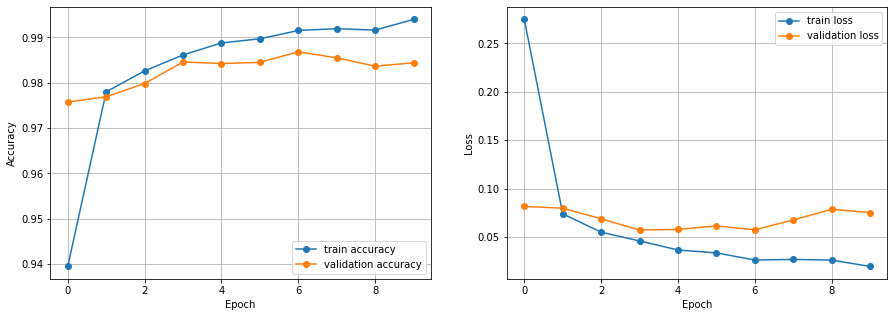

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [13]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 4s 13ms/step - loss: 0.0626 - accuracy: 0.9860

Test Accuracy: 0.9860000014305115

Test Loss: 0.06262961030006409


In [14]:
model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [15]:
h = model.fit(x=train_imgs, y=train_labels, epochs=10, validation_split=0.2,batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 66s 44ms/step - loss: 0.0101 - accuracy: 0.9971 - val_loss: 0.0762 - val_accuracy: 0.9872
Epoch 2/10
1500/1500 [==============================] - 66s 44ms/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.0742 - val_accuracy: 0.9896
Epoch 3/10
1500/1500 [==============================] - 66s 44ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0773 - val_accuracy: 0.9892
Epoch 4/10
1500/1500 [==============================] - 66s 44ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0770 - val_accuracy: 0.9899
Epoch 5/10
1500/1500 [==============================] - 66s 44ms/step - loss: 6.0888e-04 - accuracy: 0.9999 - val_loss: 0.0804 - val_accuracy: 0.9902
Epoch 6/10
1500/1500 [==============================] - 66s 44ms/step - loss: 3.9782e-04 - accuracy: 0.9999 - val_loss: 0.0864 - val_accuracy: 0.9893
Epoch 7/10
1500/1500 [==============================] - 65s 44ms/step - loss: 5.0547e-04 - accuracy: 0.9999 - val_lo

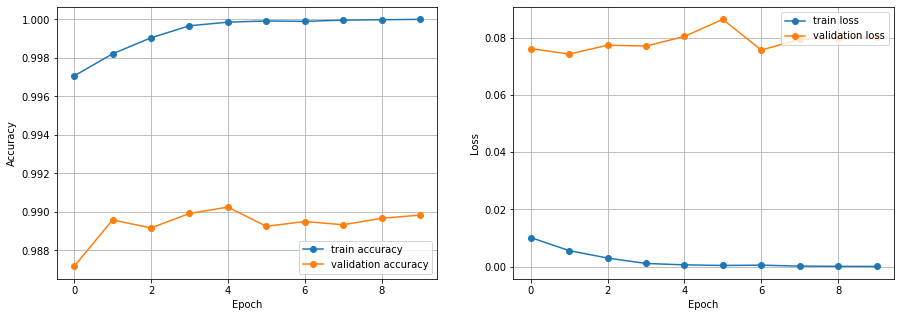

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [17]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 4s 12ms/step - loss: 0.0647 - accuracy: 0.9913

Test Accuracy: 0.9912999868392944

Test Loss: 0.06470581144094467


In [18]:
model.compile(
    optimizer='rmsprop', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
h = model.fit(x=train_imgs, y=train_labels, epochs=10, validation_split=0.2,batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 67s 45ms/step - loss: 0.0090 - accuracy: 0.9982 - val_loss: 0.1227 - val_accuracy: 0.9891
Epoch 2/10
1500/1500 [==============================] - 67s 45ms/step - loss: 0.0073 - accuracy: 0.9985 - val_loss: 0.1330 - val_accuracy: 0.9880
Epoch 3/10
1500/1500 [==============================] - 67s 45ms/step - loss: 0.0065 - accuracy: 0.9987 - val_loss: 0.1588 - val_accuracy: 0.9898
Epoch 4/10
1495/1500 [============================>.] - ETA: 0s - loss: 0.0070 - accuracy: 0.9987

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)